# Strategies with Derivatives

In [71]:
import numpy as np
import matplotlib.pyplot as plt

At first we define common derivatives and their payoff at maturity $T$.

In [72]:
def Option(X, K = 20, premium = 2, optionType = "Call", direction = "Buy", profit = True):
    
    factor = 0
    
    if direction == "Buy":
        factor = 1
    elif direction == "Sell":
        factor = -1
    
    if profit:
        if optionType == "Call":
            return factor*(np.maximum(X - K, 0) - premium)
        elif optionType == "Put":
            return factor*(np.maximum(K - X, 0) - premium)
        else:
            return
    
    else:
        if optionType == "Call":
            return np.maximum(X - K, 0)
        elif optionType == "Put":
            return np.maximum(K - X, 0)
        else:
            return
        

In [73]:
def Future(X, FT = 20):
    
    return max(X - FT)

## Option Strategies

### 1) Call Ratio Spread

A $X:1$ call ratio spread is to buy one call at a lower strike $K_{1}$ and sell $X$ calls at a higher strike $K_{2}$.

In [74]:
X = 1
K1 = 30
Premium1 = 4
K2 = 40
Premium2 = 2
domain = np.linspace(K1-10,K2+10,1000)

In [75]:
buy1 = Option(domain, K = K1, premium = Premium1, optionType = "Call", profit = True)
sell1 = 1*Option(domain, K = K2, premium = Premium2, optionType = "Call", direction = "Sell", profit = True)
profit1 = buy1 + sell1

buy2 = Option(domain, K = K1, premium = Premium1, optionType = "Call", profit = True)
sell2 = 2*Option(domain, K = K2, premium = Premium2, optionType = "Call", direction = "Sell", profit = True)
profit2 = buy2 + sell2

buy3 = Option(domain, K = K1, premium = Premium1, optionType = "Call", profit = True)
sell3 = 3*Option(domain, K = K2, premium = Premium2, optionType = "Call", direction = "Sell", profit = True)
profit3 = buy3 + sell3

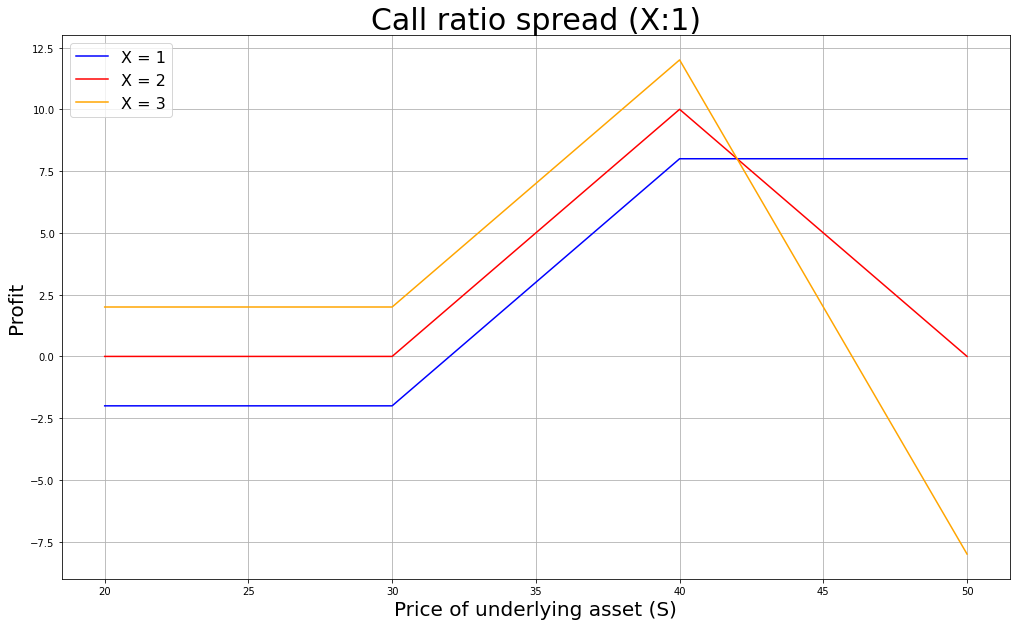

In [76]:
plt.figure(figsize=(17,10))
plt.plot(domain, profit1, color='b', label='X = 1')
plt.plot(domain, profit2, color='r', label='X = 2')
plt.plot(domain, profit3, color='orange', label='X = 3')
plt.title(r'Call ratio spread (X:1)',fontsize=30)
plt.xlabel('Price of underlying asset (S)', fontsize=20)
plt.ylabel('Profit', fontsize=20)
plt.grid()
plt.legend(fontsize=16, loc='upper left')
#plt.savefig('./assets/C25_inflation_adjusted.png', dpi=400)
plt.show()

### 2) Long Call Butterfly Spread

A long butterfly spread is created by buying two call options (one out-of-the-money and one in-the-money) and writing two at-the-money call options.

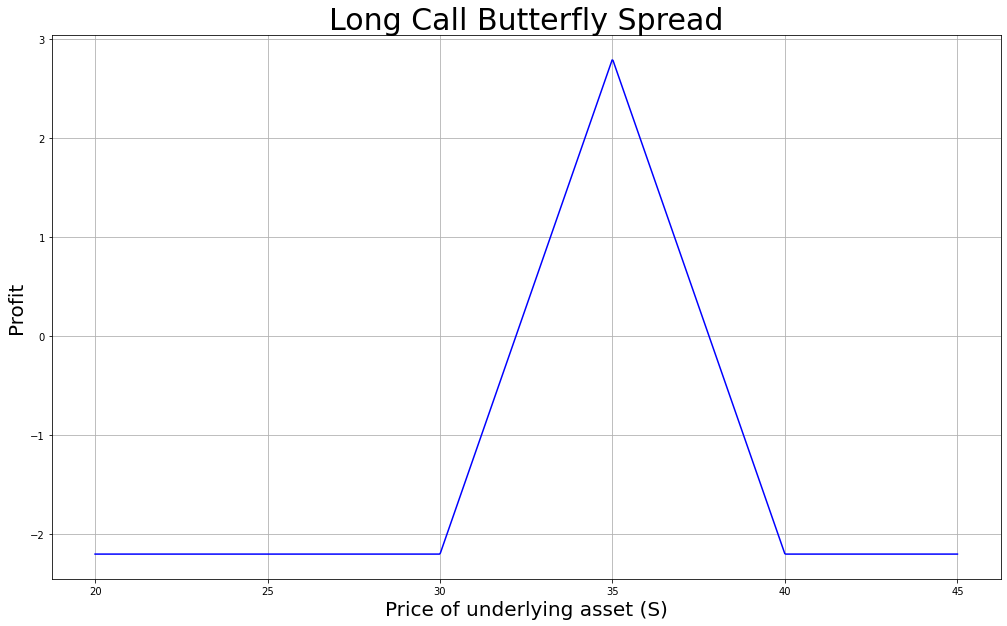

In [77]:
K1 = 30
Premium1 = 0.2
K2 = 35
Premium2 = 1
K3 = 40
Premium3 = 4

domain = np.linspace(K1-10,K2+10,1000)

buy1 = Option(domain, K = K1, premium = Premium1, optionType = "Call", profit = True)
buy2 = Option(domain, K = K3, premium = Premium3, optionType = "Call", profit = True)
sell = Option(domain, K = K2, premium = Premium2, optionType = "Call", direction = "Sell", profit = True)
profit1 = buy1 + 2*sell + buy2

plt.figure(figsize=(17,10))
plt.plot(domain, profit1, color='b')
plt.title(r'Long Call Butterfly Spread',fontsize=30)
plt.xlabel('Price of underlying asset (S)', fontsize=20)
plt.ylabel('Profit', fontsize=20)
plt.grid()
#plt.savefig('./assets/C25_inflation_adjusted.png', dpi=400)
plt.show()

### 3) Short Call Butterfly Spread

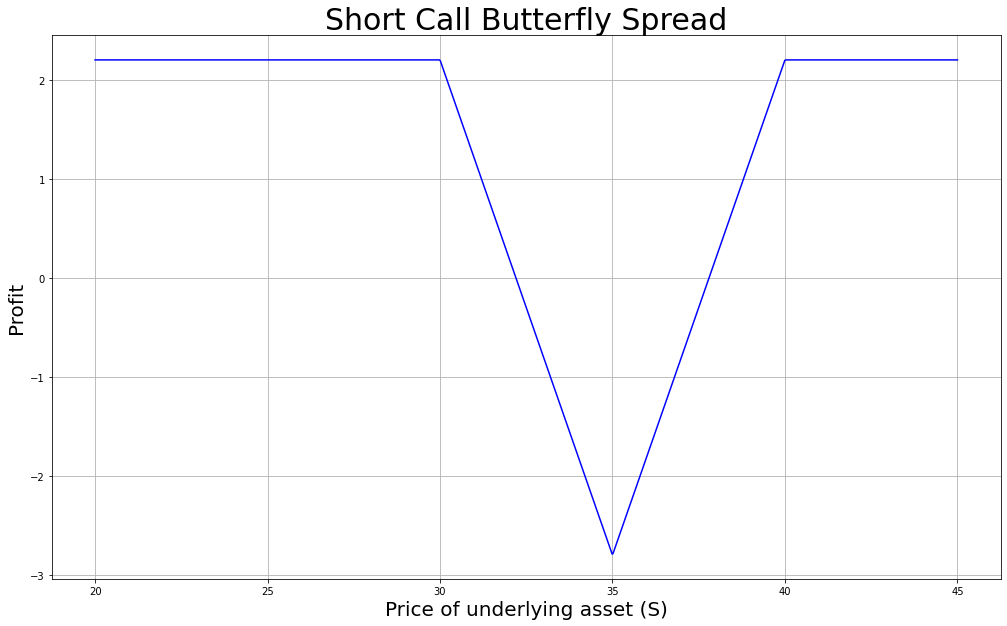

In [79]:
K1 = 30
Premium1 = 0.2
K2 = 35
Premium2 = 1
K3 = 40
Premium3 = 4

domain = np.linspace(K1-10,K2+10,1000)

sell1 = Option(domain, K = K1, premium = Premium1, optionType = "Call", direction = "Sell", profit = True)
sell2 = Option(domain, K = K3, premium = Premium3, optionType = "Call", direction = "Sell", profit = True)
buy = Option(domain, K = K2, premium = Premium2, optionType = "Call", direction = "Buy", profit = True)
profit1 = sell1 + 2*buy + sell2

plt.figure(figsize=(17,10))
plt.plot(domain, profit1, color='b')
plt.title(r'Short Call Butterfly Spread',fontsize=30)
plt.xlabel('Price of underlying asset (S)', fontsize=20)
plt.ylabel('Profit', fontsize=20)
plt.grid()
#plt.savefig('./assets/C25_inflation_adjusted.png', dpi=400)
plt.show()

### 4) Long Straddle

A long straddle consists of a call and a put option with the same maturity and strike price.

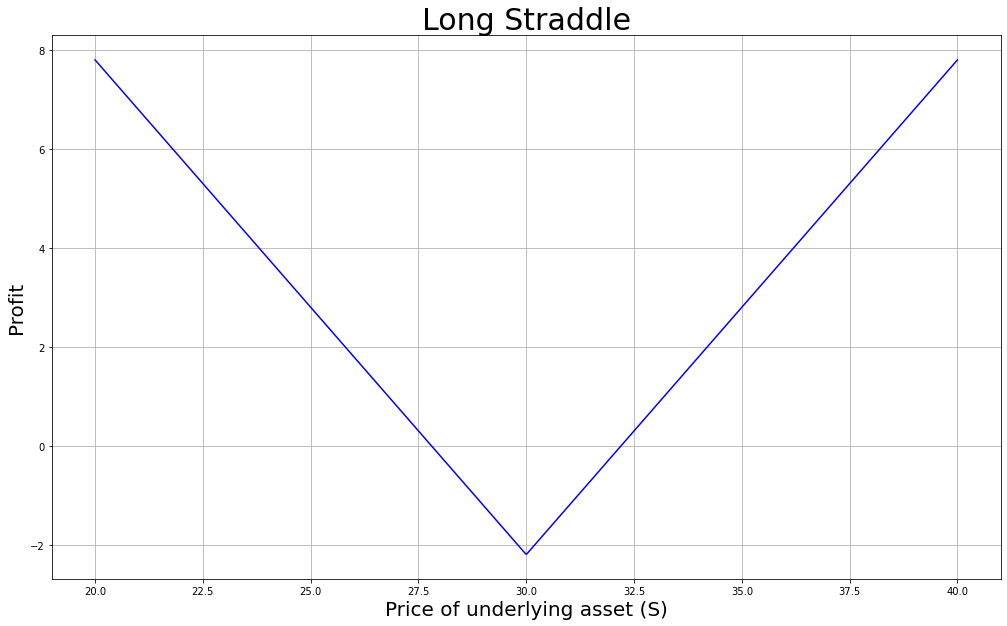

In [81]:
K1 = 30
Premium1 = 0.2
Premium2 = 2

domain = np.linspace(K1-10,K1+10,1000)

buy1 = Option(domain, K = K1, premium = Premium1, optionType = "Call", direction = "Buy", profit = True)
buy2 = Option(domain, K = K1, premium = Premium2, optionType = "Put", direction = "Buy", profit = True)
profit = buy1 + buy2

plt.figure(figsize=(17,10))
plt.plot(domain, profit, color='b')
plt.title(r'Long Straddle',fontsize=30)
plt.xlabel('Price of underlying asset (S)', fontsize=20)
plt.ylabel('Profit', fontsize=20)
plt.grid()
#plt.savefig('./assets/C25_inflation_adjusted.png', dpi=400)
plt.show()